In [ ]:
#@title Imports
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split

: 

In [ ]:
curr_week = 17

In [ ]:
#@title Functions
def displayPredictions(y_pred,X_test,model_type=None):
    for g in range(len(y_pred)):
        if model_type == None:
          try:
            win_prob = round(y_pred[g],2)
          except:
            win_prob = y_pred[g]
        elif model_type == 'xgb':
          win_prob = round(float(y_pred[g][1]),2)
        away_team = X_test.reset_index().drop(columns = 'index').loc[g,'away_name']
        home_team = X_test.reset_index().drop(columns = 'index').loc[g,'home_name']
        print(f'The {away_team} have a probability of {win_prob} of beating the {home_team}.')

In [ ]:
#@title Mount Google
# from google.colab import auth
# auth.authenticate_user()

# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
#@title Installs
# !pip3 install sportsreference
# !pip3 install sportsipy
!pip3 install git+https://github.com/davidjkrause/sportsipy@master

  Cloning https://github.com/davidjkrause/sportsipy (to revision master) to /tmp/pip-req-build-x5qwwczo
  Running command git clone --filter=blob:none --quiet https://github.com/davidjkrause/sportsipy /tmp/pip-req-build-x5qwwczo
  Resolved https://github.com/davidjkrause/sportsipy to commit 247bd7cbafcae268c6e8476a4187594eb59230df
  Preparing metadata (setup.py) ... done
  Created wheel for sportsipy: filename=sportsipy-0.6.0-py3-none-any.whl size=501371 sha256=6abde7f7a4f4b6f85d150be92ca6db9ddd1672b8b8491d2cae22bbba50e894db
  Stored in directory: /tmp/pip-ephem-wheel-cache-bfjjg51j/wheels/09/26/5b/40dd25df6c04408901881a213f7c062eb29b35f9ed80f34443
Successfully built sportsipy


In [ ]:
from sportsipy.nfl.boxscore import Boxscores, Boxscore

In [ ]:
# boxscore_df = Boxscore('202310300det')

In [ ]:
# boxscore_df.dataframe

In [ ]:
# boxscore_df.dataframe.columns

In [ ]:
pred_games_df = pd.read_csv(f'pred_games_df_{curr_week}.csv')
comp_games_df = pd.read_csv(f'comp_games_df_{curr_week}.csv')
comp_games_df_2022 = comp_games_df[comp_games_df['year']==2022]
comp_games_df_2023 = comp_games_df[comp_games_df['year']==2023]
print('ALL:', comp_games_df.shape)
print('2022:', comp_games_df_2022.shape)
print('2023:', comp_games_df_2023.shape)
# comp_games_df = comp_games_df[(comp_games_df['year']!=2023) & (comp_games_df['week']!=8) & (comp_games_df['week']!=7)]
# print(comp_games_df.shape)

ALL: (300, 36)
2022: (213, 36)
2023: (87, 36)


In [ ]:
X_2022, X_2023 = comp_games_df_2022.drop(columns = ['result']), comp_games_df_2023.drop(columns = ['result'])
X_2022.fillna(0,inplace=True)
X_2023.fillna(0,inplace=True)

y_2022,y_2023 = comp_games_df_2022[['result']], comp_games_df_2023[['result']]
X_train_2022, X_test_2022, y_train_2022, y_test_2022 = train_test_split(X_2022, y_2022, test_size=0.20, random_state=42)
X_train_2023, X_test_2023, y_train_2023, y_test_2023 = train_test_split(X_2023, y_2023, test_size=0.50, random_state=42)

X_train = pd.concat([X_train_2022, X_train_2023])
X_test = pd.concat([X_test_2022, X_test_2023])
y_train = pd.concat([y_train_2022, y_train_2023])
y_test = pd.concat([y_test_2022, y_test_2023])

test_df = X_test.copy()
X_train = X_train.drop(columns = ['year','away_name', 'away_abbr', 'home_name', 'home_abbr', 'week'])
X_test = X_test.drop(columns = ['year','away_name', 'away_abbr', 'home_name', 'home_abbr', 'week'])

print('X_train:', X_train.shape)
print('X_test:', X_test.shape)

X_train: (213, 29)
X_test: (87, 29)


In [ ]:
#@title Logistic Regression
clf = LogisticRegression(penalty='l1', dual=False, tol=0.001, C=1.0, fit_intercept=True,
                   intercept_scaling=1, class_weight='balanced', random_state=None,
                   solver='liblinear', max_iter=1000, multi_class='ovr', verbose=0)

clf.fit(X_train, np.ravel(y_train.values))
y_pred_log = clf.predict_proba(X_test)
y_pred_log = y_pred_log[:,1]

# displayPredictions(y_pred_log,test_df)

In [ ]:
from sklearn.metrics import accuracy_score

log_accuracy = accuracy_score(y_test,  np.round(y_pred_log))
log_roc_auc = roc_auc_score(y_test, np.round(y_pred_log))

print(f"Accuracy: {log_accuracy:.2f}")
print(f"ROC AUC: {log_roc_auc:.2f}")
# accuracy_score(y_test,np.round(y_pred))

Accuracy: 0.57
ROC AUC: 0.55


In [ ]:
week = pred_games_df.drop(columns = ['year','away_name', 'away_abbr', 'home_name', 'home_abbr', 'week','result'])
y_pred_week = clf.predict_proba(week)
y_pred_week = y_pred_week[:,1]

displayPredictions(y_pred_week,pred_games_df)

The New York Jets have a probability of 0.32 of beating the Cleveland Browns.
The Miami Dolphins have a probability of 0.49 of beating the Baltimore Ravens.
The Detroit Lions have a probability of 0.17 of beating the Dallas Cowboys.
The Tennessee Titans have a probability of 0.44 of beating the Houston Texans.
The New England Patriots have a probability of 0.09 of beating the Buffalo Bills.
The New Orleans Saints have a probability of 0.31 of beating the Tampa Bay Buccaneers.
The Los Angeles Chargers have a probability of 0.56 of beating the Denver Broncos.
The Cincinnati Bengals have a probability of 0.25 of beating the Kansas City Chiefs.
The Green Bay Packers have a probability of 0.33 of beating the Minnesota Vikings.


In [ ]:
#@title XGBoost
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',  # For binary classification
    n_estimators=100,             # Number of boosting rounds
    max_depth=3,                  # Maximum tree depth
    learning_rate=0.01,            # Step size shrinkage
    # subsample=0.8,                # Fraction of samples used for training
    # colsample_bytree=0.8,         # Fraction of features used for training
    random_state=42
)

# Step 5: Train the model on the training data
xgb_model.fit(X_train, y_train)

# Step 6: Make predictions and obtain probabilities
y_pred = xgb_model.predict(X_test)  # Predicted labels (0 or 1)
y_pred_prob = xgb_model.predict_proba(X_test)[:, 1]  # Predicted probabilities for class 1

# Evaluate the model using appropriate metrics (e.g., accuracy or ROC AUC)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print(f"Accuracy: {accuracy:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")

Accuracy: 0.63
ROC AUC: 0.60


In [ ]:
week = pred_games_df.drop(columns = ['year','away_name', 'away_abbr', 'home_name', 'home_abbr', 'week','result'])
xgb_y_pred_week = xgb_model.predict_proba(week)

displayPredictions(xgb_y_pred_week,pred_games_df,'xgb')

The New York Jets have a probability of 0.43 of beating the Cleveland Browns.
The Miami Dolphins have a probability of 0.56 of beating the Baltimore Ravens.
The Detroit Lions have a probability of 0.5 of beating the Dallas Cowboys.
The Tennessee Titans have a probability of 0.32 of beating the Houston Texans.
The New England Patriots have a probability of 0.29 of beating the Buffalo Bills.
The New Orleans Saints have a probability of 0.3 of beating the Tampa Bay Buccaneers.
The Los Angeles Chargers have a probability of 0.55 of beating the Denver Broncos.
The Cincinnati Bengals have a probability of 0.34 of beating the Kansas City Chiefs.
The Green Bay Packers have a probability of 0.39 of beating the Minnesota Vikings.


<Axes: >

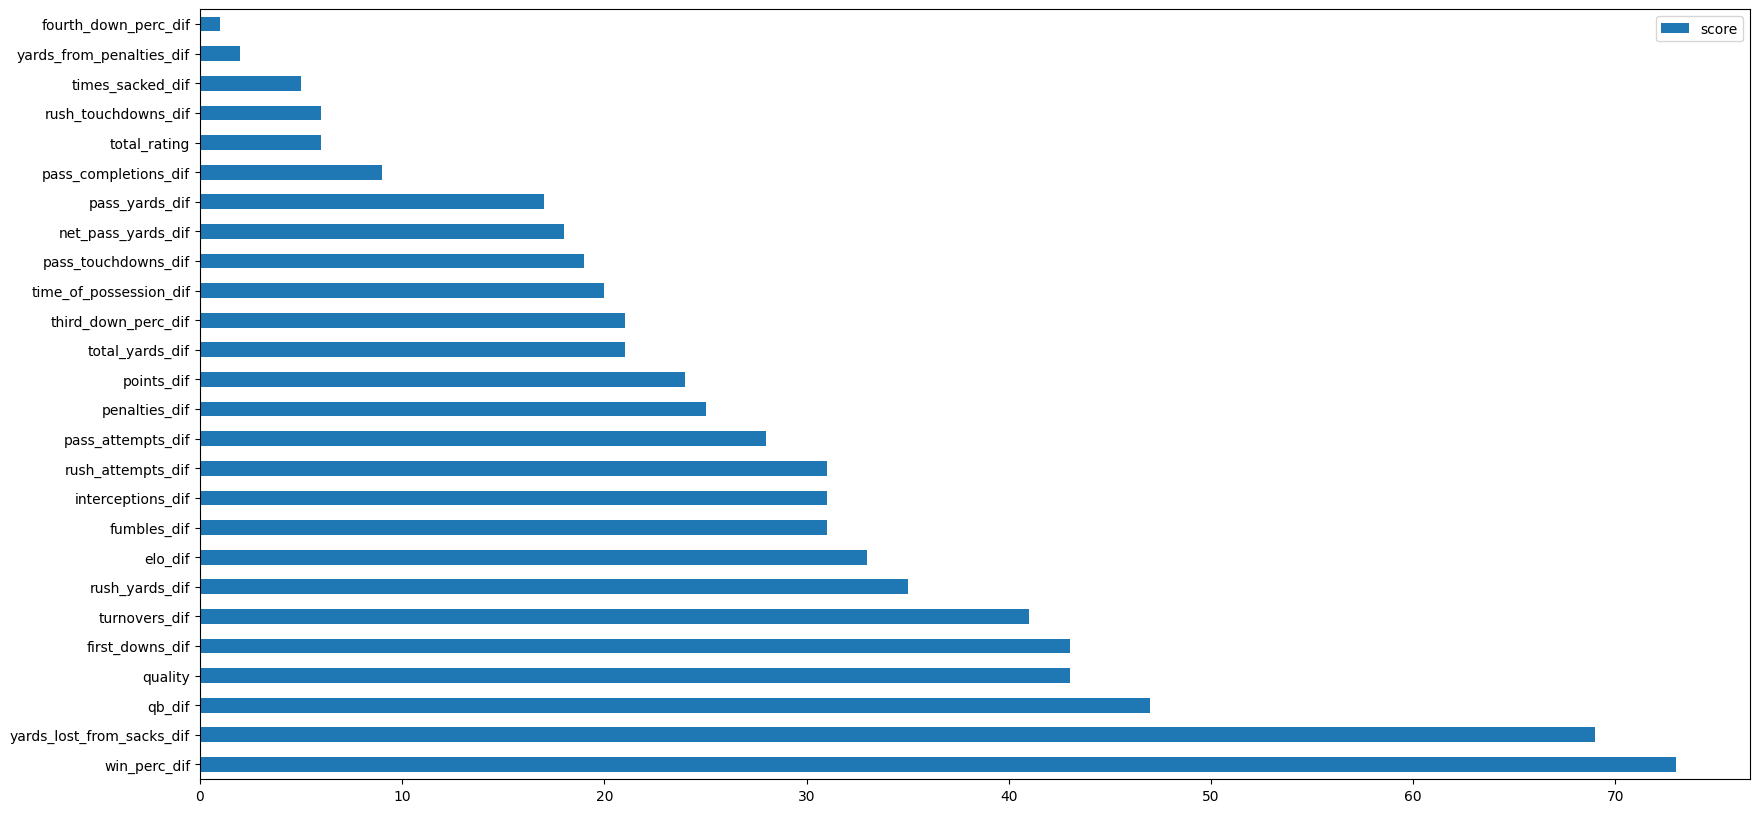

In [ ]:
#@title XGBoost - Feature Importance
feature_important = xgb_model.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score")
data.nlargest(60, columns="score").plot(kind='barh', figsize = (20,10))

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='roc_auc', cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
xgb_model_optimized = grid_search.best_estimator_

In [ ]:
# Step 6: Make predictions and obtain probabilities
y_pred_opt = xgb_model_optimized.predict(X_test)  # Predicted labels (0 or 1)
y_pred_prob_opt = xgb_model_optimized.predict_proba(X_test)[:, 1]  # Predicted probabilities for class 1

# Evaluate the model using appropriate metrics (e.g., accuracy or ROC AUC)
accuracy_opt = accuracy_score(y_test, y_pred)
roc_auc_opt = roc_auc_score(y_test, y_pred_prob)

print(f"Accuracy: {accuracy_opt:.2f}")
print(f"ROC AUC: {roc_auc_opt:.2f}")

Accuracy: 0.63
ROC AUC: 0.60


In [ ]:
xgb_y_pred_week = xgb_model_optimized.predict_proba(week)

displayPredictions(xgb_y_pred_week,pred_games_df,'xgb')

The New York Jets have a probability of 0.36 of beating the Cleveland Browns.
The Miami Dolphins have a probability of 0.49 of beating the Baltimore Ravens.
The Detroit Lions have a probability of 0.53 of beating the Dallas Cowboys.
The Tennessee Titans have a probability of 0.37 of beating the Houston Texans.
The New England Patriots have a probability of 0.29 of beating the Buffalo Bills.
The New Orleans Saints have a probability of 0.31 of beating the Tampa Bay Buccaneers.
The Los Angeles Chargers have a probability of 0.53 of beating the Denver Broncos.
The Cincinnati Bengals have a probability of 0.34 of beating the Kansas City Chiefs.
The Green Bay Packers have a probability of 0.41 of beating the Minnesota Vikings.


In [ ]:
#@title Ensemble
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',  # For binary classification
    n_estimators=100,             # Number of boosting rounds
    max_depth=3,                  # Maximum tree depth
    learning_rate=0.01,            # Step size shrinkage
    # subsample=0.8,                # Fraction of samples used for training
    # colsample_bytree=0.8,         # Fraction of features used for training
    random_state=42
)
xgb_model.fit(X_train, y_train)

# Predict probabilities using XGBoost
y_pred_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]  # Predicted probabilities for class 1

# Step 3: Train a Logistic Regression model and predict probabilities
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Predict probabilities using Logistic Regression
y_pred_prob_lr = lr_model.predict_proba(X_test)[:, 1]

# Step 4: Combine the predicted probabilities
# You can use various strategies to combine the probabilities, such as averaging, weighted averaging, or stacking.
# Here, we use simple averaging.

ensemble_probabilities = (y_pred_prob_xgb + y_pred_prob_lr) / 2
# y_pred_ensemble = lr_model

# Step 5: Convert probabilities to binary predictions
# You can set a threshold to convert the probabilities into binary predictions.
threshold = 0.5  # You can adjust the threshold as needed.
y_pred_ensemble = (ensemble_probabilities > threshold).astype(int)

# Step 6: Evaluate the ensemble model
accuracy = accuracy_score(y_test, y_pred_ensemble)
print(f"Accuracy of the ensemble model: {accuracy:.2f}")

# Step 6: Evaluate the ensemble model
# accuracy = accuracy_score(y_test, ensemble_probabilities)
# print(f"Accuracy of the ensemble model: {accuracy:.2f}")

Accuracy of the ensemble model: 0.57


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# XGB Predictions
# xgb_y_pred_week

# Log Predictions
# y_pred_week

final_ensemble_probabilities = (xgb_y_pred_week[:, 1] + y_pred_week) / 2
# y_pred_ensemble = lr_model
print(final_ensemble_probabilities)
# Step 5: Convert probabilities to binary predictions
# You can set a threshold to convert the probabilities into binary predictions.
# threshold = 0.5  # You can adjust the threshold as needed.u
# final_y_pred_ensemble = (final_ensemble_probabilities > threshold).astype(int)

displayPredictions(final_ensemble_probabilities,pred_games_df)

[0.33952731 0.48692254 0.35111326 0.40587139 0.18942395 0.31146067
 0.54384447 0.29813317 0.37161996]
The New York Jets have a probability of 0.34 of beating the Cleveland Browns.
The Miami Dolphins have a probability of 0.49 of beating the Baltimore Ravens.
The Detroit Lions have a probability of 0.35 of beating the Dallas Cowboys.
The Tennessee Titans have a probability of 0.41 of beating the Houston Texans.
The New England Patriots have a probability of 0.19 of beating the Buffalo Bills.
The New Orleans Saints have a probability of 0.31 of beating the Tampa Bay Buccaneers.
The Los Angeles Chargers have a probability of 0.54 of beating the Denver Broncos.
The Cincinnati Bengals have a probability of 0.3 of beating the Kansas City Chiefs.
The Green Bay Packers have a probability of 0.37 of beating the Minnesota Vikings.


In [ ]:
#@title Export Models

import joblib
joblib.dump(clf, f'logistic_model_{curr_week}.pkl')
joblib.dump(xgb_model, f'xgboost_model_{curr_week}.pkl')
# joblib.dump(rf_model, '/content/drive/MyDrive/performance_predicitions/rf_model.pkl')

from google.colab import files
# files.download('xgb_model.pkl')
# files.download('rf_model.pkl')
files.download(f'logistic_model_{curr_week}.pkl')
files.download(f'xgboost_model_{curr_week}.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>